# importing neccessery libriries


In [2975]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

# Importing CSV and Analyzing Data

In [2976]:
df = pd.read_csv('red_wine_ml.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,red wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,red wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,red wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,red wine


In [2977]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [2978]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [2979]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
 13  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 175.0+ KB


In [2980]:
df.duplicated().sum()

np.int64(240)

In [2981]:
string_col = df.select_dtypes(include="object").columns
df[string_col].head()

,quality_label,wine_type
0,low,red wine
1,low,red wine
2,low,red wine
3,medium,red wine
4,low,red wine


In [2982]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the quality_label is : 
quality_label
medium    837
low       744
high       18
Name: count, dtype: int64
The distribution of categorical values in the wine_type is : 
wine_type
red wine    1599
Name: count, dtype: int64


# Checking Outliers

In [2983]:
dfm = df.copy()

In [2984]:
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1fa = np.percentile(dfm.fixed_acidity, 25)
q3fa = np.percentile(dfm.fixed_acidity, 75)
print(q1fa)
print(q3fa)
iqrfa = q3fa - q1fa
print(iqrfa)
lower_treshold_fa = q1fa - (1.5*iqrfa)
print(lower_treshold_fa)
higher_treshold_fa = q3fa + (1.5*iqrfa)
print(higher_treshold_fa)
print('----------')
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1cl = np.percentile(dfm.chlorides, 25)
q3cl = np.percentile(dfm.chlorides, 75)
print(q1cl)
print(q3cl)
iqrcl = q3cl - q1cl
print(iqrcl)
lower_treshold_cl = q1cl - (1.5*iqrcl)
print(lower_treshold_cl)
higher_treshold_cl = q3cl + (1.5*iqrcl)
print(higher_treshold_cl)
print('----------')
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1su = np.percentile(dfm.sulphates, 25)
q3su = np.percentile(dfm.sulphates, 75)
print(q1su)
print(q3su)
iqrsu = q3su - q1su
print(iqrsu)
lower_treshold_su = q1su - (1.5*iqrsu)
print(lower_treshold_su)
higher_treshold_su = q3su + (1.5*iqrsu)
print(higher_treshold_su)


7.1
9.2
2.0999999999999996
3.95
12.349999999999998
----------
0.07
0.09
0.01999999999999999
0.04000000000000002
0.11999999999999998
----------
0.55
0.73
0.17999999999999994
0.28000000000000014
0.9999999999999999


# Removing Outliers

In [2985]:
# dfm_clean = dfm[
#     (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa) &
#     (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl) &
#     (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
# ]
# dfm_clean.head()

dfm_clean = dfm[
    (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa)
]
dfm_clean = dfm[
    (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl)
]
dfm_clean = dfm[
    (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
]

dfm_clean.head(20)
dfm.info()
print('---')
dfm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
 13  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 175.0+ KB
---
<class '

# Machine Starts

In [2986]:
dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
# I actually should drop wine type as we do not need it. 
# dfm.drop('quality_label', axis=1)
dfm_clean['wine_type'].replace({'white wine':0, 'red wine':1}, inplace=True)

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_84872/788181162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_84872/788181162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [2987]:
dfm_clean.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [2988]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'density', 'chlorides', 'wine_type', 'free_sulfur_dioxide', 'pH', 'sulphates', 'free_sulfur_dioxide'], axis=1)
y = dfm_clean['quality_label']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [2989]:
y_test.shape

(308,)

In [2990]:
x_test.shape

(308, 6)

# Robust Scaler

In [2991]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,total_sulfur_dioxide,alcohol
184,6.7,0.620,0.21,1.9,62.0,9.3
1166,9.9,0.540,0.26,2.0,60.0,10.2
33,6.9,0.605,0.12,10.7,83.0,9.4
202,6.8,0.500,0.11,1.5,49.0,9.5
1019,7.0,0.500,0.14,1.8,23.0,10.4
...,...,...,...,...,...,...
1294,8.2,0.635,0.10,2.1,60.0,10.9
434,10.4,0.410,0.55,3.2,54.0,9.9
1094,6.6,0.725,0.09,5.5,17.0,10.8
1242,9.0,0.400,0.41,2.0,40.0,12.2


In [2992]:
# data normalization with sklearn using RobustScaler
from sklearn.preprocessing import RobustScaler

# fit scaler on training data
scaler = RobustScaler().fit(x_train)

# transform training data
x_train = scaler.transform(x_train)

# transform testing data
x_test = scaler.transform(x_test)


# Build Models

In [2993]:
kappa_total = []
roc_auc_total = []

# For Loop For Models

In [3035]:
models_list = ['LR', 'DTC', 'GNB', 'RF', 'SVC', 'KNC', 'MLPC']

models = {
    'LR': LogisticRegression(random_state=42, max_iter=100),
    'DTC': DecisionTreeClassifier(random_state=42),
    'GNB': GaussianNB(),
    'RF': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),  # set probability=True for roc_auc_score
    'KNC': KNeighborsClassifier(),
    'MLPC': MLPClassifier(random_state=42, max_iter=300),
}

kappa_scores = {}
roc_auc_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    kappa = cohen_kappa_score(y_test, preds)

    print(f"Accuracy for {name}: {acc:.4f}")
    print(f"Cohen's Kappa for {name}: {kappa:.4f}")
    print(classification_report(y_test, preds, target_names=["low", "medium", "high"]))
    print('-------')

    kappa_scores[name] = kappa

    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(x_test)
        try:
            roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')
            print(f"ROC AUC for {name}: {roc_auc:.4f}")
            roc_auc_scores[name] = roc_auc
        except Exception as e:
            print(f"Could not calculate ROC AUC for {name}: {e}")
    else:
        print(f"{name} does not support predict_proba, skipping ROC AUC.")
    
    print('=====================')

print("Summary of Cohen's Kappa scores:")
for name, score in kappa_scores.items():
    print(f"{name}: {score:.4f}")

print("Summary of ROC AUC scores:")
for name, score in roc_auc_scores.items():
    print(f"{name}: {score:.4f}")
    

Training LR...
Accuracy for LR: 0.6818
Cohen's Kappa for LR: 0.3724
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
ROC AUC for LR: 0.8146
Training DTC...
Accuracy for DTC: 0.7143
Cohen's Kappa for DTC: 0.4457
              precision    recall  f1-score   support

         low       0.69      0.74      0.71       141
      medium       0.74      0.71      0.72       161
        high       0.50      0.33      0.40         6

    accuracy                           0.71       308
   macro avg       0.64      0.59      0.61       308
weighted avg       0.71      0.71      0.71       308

-------
ROC AUC for DTC: 0.7041
Training GNB...
Accuracy for GNB: 0.

/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

Accuracy for SVC: 0.6818
Cohen's Kappa for SVC: 0.3719
              precision    recall  f1-score   support

         low       0.68      0.67      0.67       141
      medium       0.69      0.72      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
ROC AUC for SVC: 0.8189
Training KNC...
Accuracy for KNC: 0.6981
Cohen's Kappa for KNC: 0.4032
              precision    recall  f1-score   support

         low       0.70      0.67      0.69       141
      medium       0.70      0.75      0.72       161
        high       0.00      0.00      0.00         6

    accuracy                           0.70       308
   macro avg       0.47      0.47      0.47       308
weighted avg       0.68      0.70      0.69       308

-------
ROC AUC for KNC: 0.7335
Training MLPC...


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

Accuracy for MLPC: 0.6753
Cohen's Kappa for MLPC: 0.3607
              precision    recall  f1-score   support

         low       0.66      0.68      0.67       141
      medium       0.69      0.70      0.69       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.45       308
weighted avg       0.66      0.68      0.67       308

-------
ROC AUC for MLPC: 0.8303
Summary of Cohen's Kappa scores:
LR: 0.3724
DTC: 0.4457
GNB: 0.3240
RF: 0.5073
SVC: 0.3719
KNC: 0.4032
MLPC: 0.3607
Summary of ROC AUC scores:
LR: 0.8146
DTC: 0.7041
GNB: 0.8005
RF: 0.8992
SVC: 0.8189
KNC: 0.7335
MLPC: 0.8303


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-pa

# Logistic Regression

In [ ]:
# x_test

array([[-0.52380952,  0.375     , -0.125     , -0.42857143,  0.64102564,
        -0.5625    ],
       [ 1.        ,  0.04166667,  0.03125   , -0.28571429,  0.58974359,
         0.        ],
       [-0.42857143,  0.3125    , -0.40625   , 12.14285714,  1.17948718,
        -0.5       ],
       ...,
       [-0.57142857,  0.8125    , -0.5       ,  4.71428571, -0.51282051,
         0.375     ],
       [ 0.57142857, -0.54166667,  0.5       , -0.28571429,  0.07692308,
         1.25      ],
       [ 0.        , -0.875     ,  0.59375   ,  0.71428571, -0.51282051,
         0.5       ]], shape=(308, 6))

In [ ]:

# # LogisticRegression model
# LR_model = LogisticRegression(random_state=42, max_iter=100)
# # fit model
# LR_model.fit(x_train, y_train)
# # predictions
# preds_LR = LR_model.predict(x_test)
# from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

# acc_LR = accuracy_score(y_test, preds_LR)
# print(acc_LR)

0.6818181818181818


# LR Evaluation

In [ ]:
# print(type(y_test))
# print(type(preds_LR))

# print(set(y_test))
# print(set(preds_LR))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
{0, 1, 2}
{np.int64(0), np.int64(1)}


In [ ]:
# print(classification_report(y_test, preds_LR))
# confusion_matrix(y_test, preds_LR)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       141
           1       0.69      0.71      0.70       161
           2       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 95,  46,   0],
       [ 46, 115,   0],
       [  0,   6,   0]])

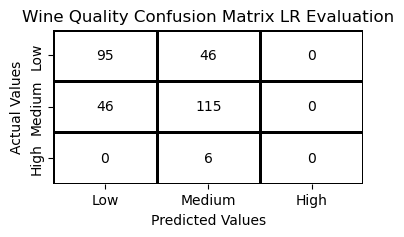

In [ ]:
# cm = confusion_matrix(y_test, preds_LR)
# cm_df = pd.DataFrame(cm,
#                      index = ["Low","Medium","High"],
#                      columns = ["Low","Medium","High"])
# plt.figure(figsize=(4,2))

# # Create a custom color map where all values are white
# cmap = sns.color_palette(["#FFFFFF"])

# sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
# plt.title('Wine Quality Confusion Matrix LR Evaluation')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.show()

In [ ]:
# print("Accuracy score:", accuracy_score(y_test, preds_LR))

# print('-------')
# print('-------')
# print('-------')
# print('-------')

# print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

# print('-------')
# print('-------')
# print('-------')
# print('-------')

# from sklearn.metrics import cohen_kappa_score
# kappa_LR = cohen_kappa_score(preds_LR, y_test)
# kappa_total.append(kappa_LR)
# print("Cohen-Kappa score kappa_LR:", kappa_LR)


# print('-------')
# print('-------')
# print('-------')
# print('-------')


Accuracy score: 0.6818181818181818
-------
-------
-------
-------
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa score kappa_LR: 0.3724218230206253
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

# Decision Tree Classifier

In [3000]:

DTC_model = DecisionTreeClassifier(random_state=42)

# fit model
DTC_model.fit(x_train, y_train)

# predictions
predsDTC = DTC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_DTC = accuracy_score(y_test, predsDTC)
print(acc_DTC)

0.7142857142857143


# DTC Evaluation

In [3001]:
print(classification_report(y_test, predsDTC))
confusion_matrix(y_test, predsDTC)



              precision    recall  f1-score   support

           0       0.69      0.74      0.71       141
           1       0.74      0.71      0.72       161
           2       0.50      0.33      0.40         6

    accuracy                           0.71       308
   macro avg       0.64      0.59      0.61       308
weighted avg       0.71      0.71      0.71       308



array([[104,  37,   0],
       [ 45, 114,   2],
       [  1,   3,   2]])

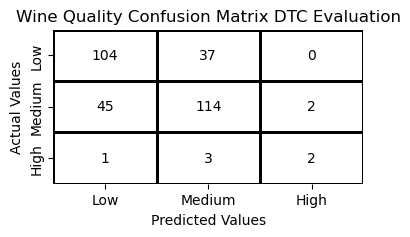

In [3002]:
cm = confusion_matrix(y_test, predsDTC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix DTC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [3003]:
print('-------')
print('-------')
print('-------')
print('-------')

print("Accuracy score:", accuracy_score(y_test, predsDTC))

print('-------')
print('-------')
print('-------')
print('-------')

print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

print('-------')
print('-------')
print('-------')
print('-------')

from sklearn.metrics import cohen_kappa_score
kappaDTC = cohen_kappa_score(predsDTC, y_test)
kappa_total.append(kappaDTC)
print("Cohen-Kappa score kappaDTC:", kappaDTC)

print('-------')
print('-------')
print('-------')
print('-------')

-------
-------
-------
-------
Accuracy score: 0.7142857142857143
-------
-------
-------
-------
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa score kappaDTC: 0.4456806282722513
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

# GaussianNB

In [3004]:


GNB_model = GaussianNB()

# fit model
GNB_model.fit(x_train, y_train)

# predictions
predsGNB = GNB_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score 

acc_GNB = accuracy_score(y_test, predsGNB)
print(acc_GNB)

0.6558441558441559


# GNB Evaluation

In [3005]:
print(classification_report(y_test, predsGNB))
confusion_matrix(y_test, predsGNB)

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       141
           1       0.68      0.66      0.67       161
           2       0.00      0.00      0.00         6

    accuracy                           0.66       308
   macro avg       0.44      0.45      0.44       308
weighted avg       0.64      0.66      0.65       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 96,  45,   0],
       [ 55, 106,   0],
       [  0,   6,   0]])

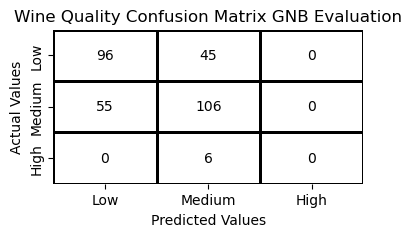

In [3006]:
cm = confusion_matrix(y_test, predsGNB)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix GNB Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [3007]:
print("Accuracy score:", accuracy_score(y_test, predsGNB))

print('-------')
print('-------')
print('-------')
print('-------')

print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

print('-------')
print('-------')
print('-------')
print('-------')

from sklearn.metrics import cohen_kappa_score
kappaGNB = cohen_kappa_score(predsGNB, y_test)
kappa_total.append(kappaGNB)
print("Cohen-Kappa score kappaGNB:", kappaGNB)

print('-------')
print('-------')
print('-------')
print('-------')

Accuracy score: 0.6558441558441559
-------
-------
-------
-------
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa score kappaGNB: 0.3240019877422561
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

# Random Forest

In [3008]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)
# fit model
RF_clf.fit(x_train, y_train)
# predictions
predsRF = RF_clf.predict(x_test)
# accuracy
acc_RF = accuracy_score(y_test, predsRF)
print(acc_RF)

0.7597402597402597


# RF Evaluation

In [3009]:
print(classification_report(y_test, predsRF))
confusion_matrix(y_test, predsRF)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       141
           1       0.75      0.81      0.78       161
           2       1.00      0.17      0.29         6

    accuracy                           0.76       308
   macro avg       0.84      0.57      0.60       308
weighted avg       0.76      0.76      0.76       308



array([[103,  38,   0],
       [ 31, 130,   0],
       [  0,   5,   1]])

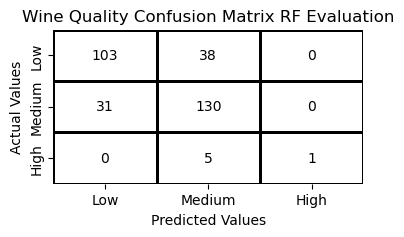

In [3010]:
cm = confusion_matrix(y_test, predsRF)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix RF Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [3011]:
print("Accuracy score:", accuracy_score(y_test, predsRF))

print('-------')
print('-------')
print('-------')
print('-------')

print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

print('-------')
print('-------')
print('-------')
print('-------')

from sklearn.metrics import cohen_kappa_score
kappaRF = cohen_kappa_score(predsRF, y_test)
kappa_total.append(kappaRF)
print("Cohen-Kappa score kappaRF:", kappaRF)

print('-------')
print('-------')
print('-------')
print('-------')


probs_RF = RF_clf.predict_proba(x_test)
auc_score_RF = roc_auc_score(y_test, probs_RF, multi_class='ovr')
roc_auc_total.append(auc_score_RF)
print("MLPC ROC AUC:", auc_score_RF)

print('-------')
print('-------')
print('-------')
print('-------')

Accuracy score: 0.7597402597402597
-------
-------
-------
-------
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa score kappaRF: 0.5262621853630147
-------
-------
-------
-------
MLPC ROC AUC: 0.8659938260173008
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

# SVC Model

In [3012]:


SVC_model = SVC(random_state=42, probability=True)

# fit model
SVC_model.fit(x_train, y_train)

# predictions
predsSVC = SVC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_SVC = accuracy_score(y_test, predsSVC)
print(acc_SVC)

0.6818181818181818


# SVC Evaluation

In [3013]:
print(classification_report(y_test, predsSVC))
confusion_matrix(y_test, predsSVC)

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       141
           1       0.69      0.72      0.70       161
           2       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 94,  47,   0],
       [ 45, 116,   0],
       [  0,   6,   0]])

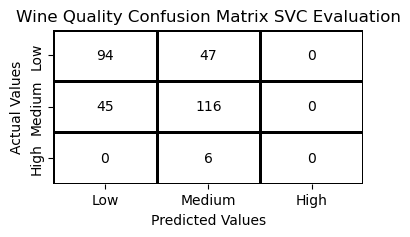

In [3014]:
cm = confusion_matrix(y_test, predsSVC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix SVC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [3015]:
print("Accuracy score:", accuracy_score(y_test, predsSVC))

print('-------')
print('-------')
print('-------')
print('-------')

print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

print('-------')
print('-------')
print('-------')
print('-------')

from sklearn.metrics import cohen_kappa_score
kappaSVC = cohen_kappa_score(predsSVC, y_test)
kappa_total.append(kappaSVC)
print("Cohen-Kappa score kappaSVC:", kappaSVC)

print('-------')
print('-------')
print('-------')
print('-------')


probs_SVC = SVC_model.predict_proba(x_test)
auc_score_SVC = roc_auc_score(y_test, probs_SVC, multi_class='ovr')
roc_auc_total.append(auc_score_SVC)
print("MLPC ROC AUC:", auc_score_SVC)

print('-------')
print('-------')
print('-------')
print('-------')

Accuracy score: 0.6818181818181818
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa score kappaSVC: 0.3718994506409189
-------
-------
-------
-------
MLPC ROC AUC: 0.8189428574684864
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# KNeighborsClassifier

In [3016]:

KNC_model = KNeighborsClassifier(n_neighbors=5)

# fit model
KNC_model.fit(x_train, y_train)

# predictions
predsKNC = KNC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_KNC = accuracy_score(y_test, predsKNC)
print(acc_KNC)


0.698051948051948


# KNC Evaluation

In [3017]:
print(classification_report(y_test, predsKNC))
confusion_matrix(y_test, predsKNC)

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       141
           1       0.70      0.75      0.72       161
           2       0.00      0.00      0.00         6

    accuracy                           0.70       308
   macro avg       0.47      0.47      0.47       308
weighted avg       0.68      0.70      0.69       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 95,  46,   0],
       [ 41, 120,   0],
       [  0,   6,   0]])

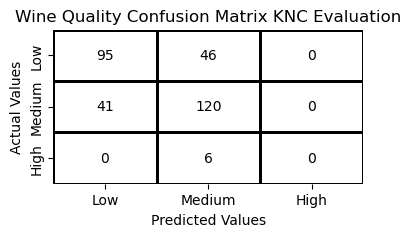

In [3018]:
cm = confusion_matrix(y_test, predsKNC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix KNC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [3019]:
print("Accuracy score:", accuracy_score(y_test, predsKNC))

print('-------')
print('-------')
print('-------')
print('-------')

print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

print('-------')
print('-------')
print('-------')
print('-------')


kappaKNC = cohen_kappa_score(predsKNC, y_test)
kappa_total.append(kappaKNC)
print("Cohen-Kappa scorekappaKNC:", kappaKNC)

print('-------')
print('-------')
print('-------')
print('-------')


probs_KNC = KNC_model.predict_proba(x_test)
auc_score_KNC = roc_auc_score(y_test, probs_KNC, multi_class='ovr')
roc_auc_total.append(auc_score_KNC)
print("MLPC ROC AUC:", auc_score_KNC)

print('-------')
print('-------')
print('-------')
print('-------')

Accuracy score: 0.698051948051948
-------
-------
-------
-------
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa scorekappaKNC: 0.40320026668889075
-------
-------
-------
-------
MLPC ROC AUC: 0.7334833882412704
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

# AdaBoostClassifier

In [3020]:

ABC_model = AdaBoostClassifier(n_estimators=50)

# fit model
ABC_model.fit(x_train, y_train)

# predictions
predsABC = ABC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_ABC = accuracy_score(y_test, predsABC)
print(acc_ABC)


0.6590909090909091


# ADBC Evaluation

In [3021]:
print(classification_report(y_test, predsABC))
confusion_matrix(y_test, predsABC)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       141
           1       0.68      0.67      0.67       161
           2       0.00      0.00      0.00         6

    accuracy                           0.66       308
   macro avg       0.44      0.45      0.44       308
weighted avg       0.65      0.66      0.65       308



array([[ 95,  46,   0],
       [ 52, 108,   1],
       [  0,   6,   0]])

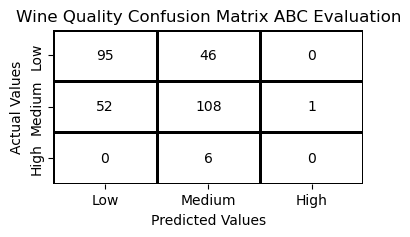

In [3022]:
cm = confusion_matrix(y_test, predsABC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix ABC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [3023]:
print("Accuracy score:", accuracy_score(y_test, predsABC))

print('-------')
print('-------')
print('-------')
print('-------')

print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

print('-------')
print('-------')
print('-------')
print('-------')

from sklearn.metrics import cohen_kappa_score
kappaABC = cohen_kappa_score(predsABC, y_test)
kappa_total.append(kappaABC)
print("Cohen-Kappa score kappaABC:", kappaABC)

print('-------')
print('-------')
print('-------')
print('-------')


probs_ABC = ABC_model.predict_proba(x_test)
auc_score_ABC = roc_auc_score(y_test, probs_ABC, multi_class='ovr')
roc_auc_total.append(auc_score_ABC)
print("MLPC ROC AUC:", auc_score_ABC)

print('-------')
print('-------')
print('-------')
print('-------')

Accuracy score: 0.6590909090909091
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa score kappaABC: 0.33141758491658224
-------
-------
-------
-------
MLPC ROC AUC: 0.746433831987361
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# MLPClassifier (Neural Network)


In [3024]:

MLPC_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)

# fit model
MLPC_model.fit(x_train, y_train)

# predictions
predsMLPC = MLPC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_MLPC = accuracy_score(y_test, predsMLPC)
print(acc_MLPC)

0.6818181818181818


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# MLPC Evaluation

In [3025]:
print(classification_report(y_test, predsMLPC))
confusion_matrix(y_test, predsMLPC)

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       141
           1       0.69      0.71      0.70       161
           2       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.68       308



/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

array([[ 96,  45,   0],
       [ 47, 114,   0],
       [  0,   6,   0]])

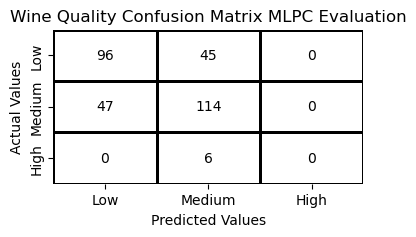

In [3026]:
cm = confusion_matrix(y_test, predsMLPC)
cm_df = pd.DataFrame(cm,
                     index = ["Low","Medium","High"],
                     columns = ["Low","Medium","High"])
plt.figure(figsize=(4,2))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine Quality Confusion Matrix MLPC Evaluation')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [3027]:
print("Accuracy score:", accuracy_score(y_test, predsMLPC))

print('-------')
print('-------')
print('-------')
print('-------')

print(classification_report(y_test, preds_LR, target_names=["low","medium", 'high']))

print('-------')
print('-------')
print('-------')
print('-------')


kappaMLPC = cohen_kappa_score(predsMLPC, y_test)
kappa_total.append(kappaMLPC)
print("Cohen-Kappa score kappaMLPC :", kappaMLPC)

print('-------')
print('-------')
print('-------')
print('-------')


probs_MLPC = MLPC_model.predict_proba(x_test)
auc_score_MPLC = roc_auc_score(y_test, probs_MLPC, multi_class='ovr')
roc_auc_total.append(auc_score_MPLC)
print("MLPC ROC AUC:", auc_score_MPLC)


print('-------')
print('-------')
print('-------')
print('-------')

Accuracy score: 0.6818181818181818
-------
-------
-------
-------
              precision    recall  f1-score   support

         low       0.67      0.67      0.67       141
      medium       0.69      0.71      0.70       161
        high       0.00      0.00      0.00         6

    accuracy                           0.68       308
   macro avg       0.45      0.46      0.46       308
weighted avg       0.67      0.68      0.67       308

-------
-------
-------
-------
Cohen-Kappa score kappaMLPC : 0.3729433272394881
-------
-------
-------
-------
MLPC ROC AUC: 0.8272927064285079
-------
-------
-------
-------


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

# For Loop to test Kappa Evaluations

In [ ]:
# models = ['LR', 'DTC', 'GNB', 'RF', 'SVC', 'KNC', 'MLPC']
kappa_dict = dict(zip(models, kappa_total))
print(kappa_dict)

for model, score in kappa_dict.items():
    if score < 0.20:
        print(f'{model} has Poor agreement with a Kappa value of {score}') 
    elif 0.20 <= score < 0.40:
        print(f'{model} has Fair agreement with a Kappa value of {score}') 
    elif 0.40 <= score < 0.60:
        print(f'{model} has Good agreement with a Kappa value of {score}')
    else:
        print(f'{model} has Very good agreement with a Kappa value of {score}') 

{'LR': 0.3724218230206253, 'DTC': 0.4456806282722513, 'GNB': 0.3240019877422561, 'RF': 0.5262621853630147, 'SVC': 0.3718994506409189, 'KNC': 0.40320026668889075, 'MLPC': 0.33141758491658224}
LR has Fair agreement with a Kappa value of 0.3724218230206253
DTC has Good agreement with a Kappa value of 0.4456806282722513
GNB has Fair agreement with a Kappa value of 0.3240019877422561
RF has Good agreement with a Kappa value of 0.5262621853630147
SVC has Fair agreement with a Kappa value of 0.3718994506409189
KNC has Good agreement with a Kappa value of 0.40320026668889075
MLPC has Fair agreement with a Kappa value of 0.33141758491658224


# Pre Scaling Kappa Values

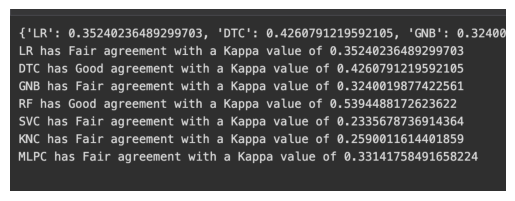

In [3029]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and show the screenshot
img = Image.open("/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project02/pre_scaling_kappa_values.png")
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# ROC-AUC (Receiver Operating Characteristic - Area Under Curve)


In [3030]:
from sklearn.metrics import roc_auc_score

models = ['LR', 'DTC', 'GNB', 'RF', 'SVC', 'KNC', 'MLPC']
kappa_dict = dict(zip(models, kappa_total))
print(kappa_dict)

for model, score in kappa_dict.items():
    if score < 0.20:
        print(f'{model} has Poor agreement with a Kappa value of {score}') 
    elif 0.20 <= score < 0.40:
        print(f'{model} has Fair agreement with a Kappa value of {score}') 
    elif 0.40 <= score < 0.60:
        print(f'{model} has Good agreement with a Kappa value of {score}')
    else:
        print(f'{model} has Very good agreement with a Kappa value of {score}') 

# You need predicted probabilities, not labels
probs_LR = LR_model.predict_proba(x_test)[:, 1]  # probabilities for class 1

auc_score = roc_auc_score(y_test, probs_LR)
print("ROC AUC:", auc_score)


{'LR': 0.3724218230206253, 'DTC': 0.4456806282722513, 'GNB': 0.3240019877422561, 'RF': 0.5262621853630147, 'SVC': 0.3718994506409189, 'KNC': 0.40320026668889075, 'MLPC': 0.33141758491658224}
LR has Fair agreement with a Kappa value of 0.3724218230206253
DTC has Good agreement with a Kappa value of 0.4456806282722513
GNB has Fair agreement with a Kappa value of 0.3240019877422561
RF has Good agreement with a Kappa value of 0.5262621853630147
SVC has Fair agreement with a Kappa value of 0.3718994506409189
KNC has Good agreement with a Kappa value of 0.40320026668889075
MLPC has Fair agreement with a Kappa value of 0.33141758491658224


ValueError: multi_class must be in ('ovo', 'ovr')

# Predicting Quality - Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'wine_type'], axis=1)
y = dfm_clean['quality']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=12)

In [ ]:
from sklearn.linear_model import LinearRegression

LinearR_model = LinearRegression()

LinearR_model.fit(x_train, y_train)

preds = LinearR_model.predict(x_test)

# when I changed the value of random state it jumped from 55 to 67 accuracy. 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("MSE:", mse)
print("R2:", r2)


MSE: 0.40259512953619947
R2: 0.365500658421019
